In [1]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("tianyin/RotBench")

In [2]:
import random
data = ds['large'] # or dataset['small']

sample = random.choice(data)
image = sample['image']  # PIL Image object
image_name = sample['image_name']


In [8]:
import io
import base64
import ollama

# Save image to a BytesIO buffer
buf = io.BytesIO()
image.save(buf, format="JPEG")
img_bytes = buf.getvalue()

# Encode image as base64 string
img_b64 = base64.b64encode(img_bytes).decode("utf-8")

response = ollama.chat(
    model="llava",
    messages=[{
        "role": "user",
        "content": "Describe this image in English.",
        "images": [img_b64],
    }]
)

print(response["message"]["content"])


 In the image, there are two women at a street fair or market. The woman on the left is wearing sunglasses and a wide-brimmed straw hat, and she's holding up a colorful garment to her face as if comparing it with another piece of clothing nearby. She has on a blue top and is standing next to a rack filled with various items for sale, suggesting they are at a street market or flea market.

The woman on the right appears to be looking at an item she is holding up in front of her, which seems to be a red garment. She has long hair, is wearing sunglasses, and also has on a straw hat similar to the one on the left. She's dressed in a casual white top and shorts, and there's a noticeable smile on her face as she examines the item.

Both women seem to be engaged in browsing or purchasing items at this outdoor event. The overall setting appears to be a sunny day outdoors, given their sunglasses and hats, and it looks like a pleasant, leisurely atmosphere typical of street fairs or markets. 


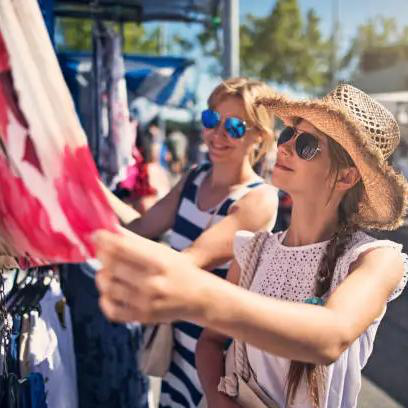

In [9]:
image